In [11]:
pip install numpy opencv-python scikit-image matplotlib


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from google.colab import files


In [13]:
def is_homogeneous(region, threshold=0.05):
    if region.size == 0:
        return True
    return np.std(region) < threshold

def split_image(image, threshold=0.05):
    regions = []
    def recursive_split(x0, y0, x1, y1):
        region = image[y0:y1, x0:x1]
        if is_homogeneous(region, threshold) or min(x1-x0, y1-y0) <= 1:
            regions.append((x0, y0, x1, y1))
        else:
            xm, ym = (x0+x1)//2, (y0+y1)//2
            recursive_split(x0, y0, xm, ym)
            recursive_split(xm, y0, x1, ym)
            recursive_split(x0, ym, xm, y1)
            recursive_split(xm, ym, x1, y1)
    recursive_split(0, 0, image.shape[1], image.shape[0])
    return regions

def plot_regions(image, regions, title="Split-and-Merge Segmentation"):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    for (x0, y0, x1, y1) in regions:
        plt.plot([x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0], 'r-', linewidth=1)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [14]:

uploaded = files.upload()  # Opens file chooser
image_path = list(uploaded.keys())[0]
print(f" Uploaded image: {image_path}")
img = io.imread(image_path)

# Handle alpha channel (RGBA -> RGB)
if img.ndim == 3 and img.shape[-1] == 4:
    img = img[:, :, :3]
    print("Alpha channel detected and removed.")

# Convert to grayscale
if img.ndim == 3:
    gray = color.rgb2gray(img)
else:
    gray = img.astype(float)/255

# Optional: resize for faster processing
gray = resize(gray, (gray.shape[0]//2, gray.shape[1]//2), anti_aliasing=True)
gray = gray / gray.max()



Saving IMG_2222.PNG to IMG_2222 (7).PNG
 Uploaded image: IMG_2222 (7).PNG
Alpha channel detected and removed.


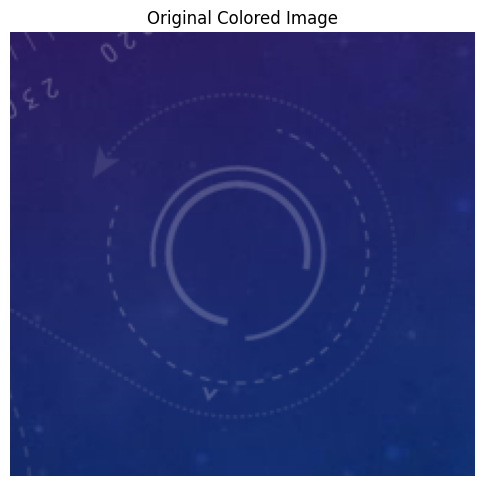

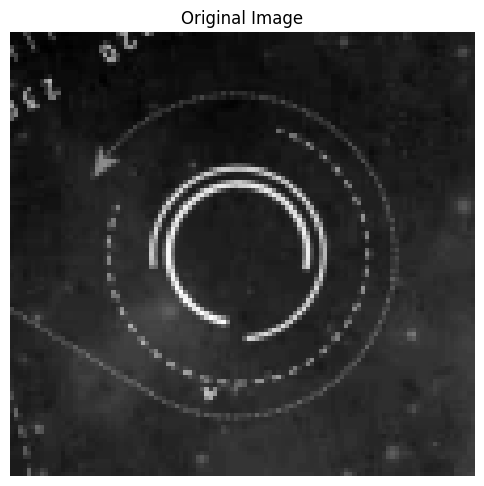

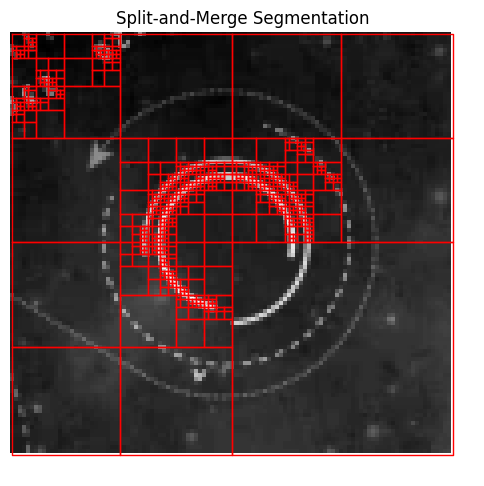

In [15]:
# Display original colored image
plt.figure(figsize=(6,6))
plt.imshow(img)  # img is RGB (or RGBA with alpha removed)
plt.title("Original Colored Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# -----------------------------
# 5️⃣ Apply Split-and-Merge
# -----------------------------
regions = split_image(gray, threshold=0.05)


plot_regions(gray, regions)


# 📘 Region-Based Image Segmentation Using Split-and-Merge Technique

---

## 📑 Table of Contents

1. Introduction  
2. Background: Region-Based Segmentation  
3. What is Split-and-Merge Segmentation?  
4. Mathematical / Algorithmic Foundation  
5. Split-and-Merge Segmentation Pipeline  
6. Python Dependencies (For Jupyter Notebook)  
7. Applications  
8. Limitations  
9. Future Research Directions  

---

## 1. Introduction

Image segmentation is a core task in computer vision that divides an image into **meaningful regions** based on pixel properties such as intensity, color, texture, and spatial location. Unlike simple thresholding or edge detection, **region-based segmentation** groups pixels into **coherent regions** representing actual objects or areas in the image.

**Split-and-Merge segmentation** recursively divides the image into smaller regions (splitting) and optionally merges similar neighboring regions to produce homogeneous segments. It is simple, intuitive, and particularly useful for images with **uniform areas**.

---

## 2. Background: Region-Based Segmentation

Region-based segmentation works by:

- Grouping neighboring pixels  
- Ensuring region homogeneity  
- Maintaining boundary consistency  

**Classical Region-Based Methods**

| Method            | Description                  |
|------------------|------------------------------|
| Region Growing    | Starts from seed points and expands neighboring pixels that meet a similarity criterion |
| **Split & Merge** | Divides image recursively based on homogeneity; merges similar regions afterward |
| Watershed         | Uses gradient topology to segment regions |
| Active Contours   | Energy-based curve fitting for boundaries |

Split-and-Merge is a **homogeneity-based segmentation technique**, relying on pixel intensity statistics rather than edge detection.

---

## 3. What is Split-and-Merge Segmentation?

Split-and-Merge works as follows:

1. **Split Step:**  
   - Start with the whole image as one region.  
   - If the region is **not homogeneous**, divide it into four smaller squares.  
   - Repeat recursively until all regions are homogeneous or minimal in size.  

2. **Merge Step (optional):**  
   - Neighboring regions with similar intensity can be combined.  

This method produces:

- Homogeneous regions  
- Preserved boundaries  
- Reduced sensitivity to noise  

---

## 4. Mathematical / Algorithmic Foundation

### 4.1 Homogeneity Criterion

A region \(R\) is homogeneous if:

$$
\sigma_R < T
$$

Where:
- $$\sigma_R$$ = standard deviation of pixel intensities in the region  
- \(T\) = user-defined threshold controlling sensitivity  

---

### 4.2 Recursive Splitting

- Non-homogeneous regions are divided into **four quadrants**
- Splitting continues recursively until homogeneity is satisfied or the region is minimal (1×1 pixel).

---
### 4.3 Optional Merging

- After splitting, adjacent regions with **similar intensity** can be merged.  
- This reduces over-segmentation and creates **cohesive segments**.

---

## 5. Split-and-Merge Segmentation Pipeline

**Workflow:**

1. **Image Acquisition** – Load original image  
2. **Preprocessing** – Convert to grayscale; remove alpha channel; normalize intensity  
3. **Recursive Splitting** – Divide image into smaller blocks based on homogeneity  
4. **Region Merging** – Merge similar neighboring regions (optional)  
5. **Label Assignment** – Assign unique labels to each region  
6. **Visualization** – Draw rectangles or fill regions to visualize segmentation

----

## 6. Applications

Split-and-Merge segmentation can be applied in various domains:

- **Medical Imaging:**  
  - Segment tumors, organs, or lesions in MRI, CT, or X-ray scans.  
  - Helps doctors identify regions of interest quickly.

- **Industrial Vision:**  
  - Detect surface defects or anomalies in manufactured products.  
  - Useful for quality control and automated inspection.

- **Remote Sensing:**  
  - Identify land, water, vegetation, or urban areas in satellite images.  
  - Helps in environmental monitoring and urban planning.

- **Autonomous Systems:**  
  - Segment roads, obstacles, and objects for self-driving cars or robots.  
  - Improves navigation and object avoidance.

---

## 7. Limitations

While Split-and-Merge is powerful, it has some limitations:

- **Threshold sensitivity:**  
  - The homogeneity threshold must be carefully chosen. Too high → under-segmentation; too low → over-segmentation.

- **Rectangular regions:**  
  - The algorithm splits the image into squares, which may not perfectly match irregularly shaped objects.

- **Optional merge step:**  
  - Without merging, the algorithm can produce many small regions, making results harder to interpret.

- **Grayscale limitation:**  
  - Works on pixel intensity only; ignores color information unless adapted.

- **Computational cost:**  
  - Large images require more processing time due to recursive splitting.

---

## 8. Future Research Directions

Potential improvements and extensions for Split-and-Merge segmentation:

- **Automatic region merging:**  
  - Combine adjacent homogeneous regions to produce cleaner segmentation maps.

- **Overlay segmentation on color images:**  
  - Show segments directly on the original colored image for better visualization.

- **Adaptive thresholding:**  
  - Dynamically adjust the threshold based on local intensity variations.

- **Hybrid methods:**  
  - Combine with edge detection or deep learning for improved accuracy.

- **Color-based segmentation:**  
  - Extend the technique to consider multiple channels (RGB) instead of grayscale only.
